In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as f
import numpy as np 
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt 
import auto_encoder

In [3]:
get_dataset = auto_encoder.get_dataset
data_2 = '2_qubit_crit_data.npz'
data_4 = '4_qubit_crit_data.npz'
data_6 = '6_qubit_crit_data.npz'
data_7 = '7_qubit_crit_data.npz'
#data_10 = '10_qubit_crit_data.npz'

#data_11 = '11_qubit_crit_data.npz'
#data_12 = '12_qubit_crit_data.npz'



training_n_sizes = [2,4,7]
validation_n_sizes = [6,2,4,7]


training_data_2 = get_dataset(data_2, 2, 10000)
training_data_4 = get_dataset(data_4,4,10000)
training_data_7 = get_dataset(data_7,7,10000) 

training_data_2, val_data_2 = random_split(training_data_2, [9000,1000])
training_data_4, val_data_4 = random_split(training_data_4, [9000,1000])
training_data_7, val_data_7 = random_split(training_data_7, [9000,1000])

#training_data_10 = get_dataset(data_10,10,10000)


datasets = [training_data_2,
            training_data_4,
            training_data_7]

training_loaders = [DataLoader(x, batch_size = 32,  shuffle=True, num_workers=20) for x in datasets]

val_data_6 = get_dataset(data_6, 6, 10000)

val_datasets = [val_data_6, val_data_2, val_data_4, val_data_7]

val_loaders = [DataLoader(x,batch_size = 10000, num_workers=20) for x in val_datasets]

#test_loader = DataLoader(training_data_10, batch_size = 1000, num_workers = 20)

/import/linux/home1/jszacha1/research/MPSML/code/mps/virtual_env/lib/python3.7/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [4]:
warmup_2 = next(iter(training_loaders[0]))
warmup_4 = next(iter(training_loaders[1]))
warmup_7 = next(iter(training_loaders[2]))

In [5]:
mps_size = 5
model = auto_encoder.MPS_autoencoder(mps_size = mps_size)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.MSELoss(reduction='sum')

warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]

for j in range(10):
    for i in range(3):
        for epoch in range(10):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 10 == 0):
                print(warmup_data[i][1],"\t", loss.item() *(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

2 	 116.9114990234375
4 	 213.138916015625


/import/linux/home1/jszacha1/research/MPSML/code/mps/virtual_env/lib/python3.7/site-packages/torch/autograd/__init__.py:147: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag


7 	 11859.3388671875
2 	 16.71185302734375
4 	 129.10865783691406
7 	 1768.77685546875
2 	 4.6248674392700195
4 	 85.885009765625
7 	 1048.7083740234375
2 	 7.5653204917907715
4 	 63.77613067626953
7 	 634.686767578125
2 	 5.237155437469482
4 	 27.410463333129883
7 	 428.2261657714844
2 	 2.6074676513671875
4 	 23.8426570892334
7 	 334.160400390625
2 	 3.579042434692383
4 	 26.18796157836914
7 	 376.88458251953125
2 	 2.607476234436035
4 	 26.82280921936035
7 	 594.945556640625
2 	 2.5143661499023438
4 	 16.802719116210938
7 	 357.57403564453125
2 	 1.8714324235916138
4 	 9.820295333862305
7 	 299.5926513671875


In [6]:
for j in range(10):
    print("Cycle: \t", j)
    print("*"*40)
    for i in range(3):
        for epoch in range(201):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 100 == 0):
                print(warmup_data[i][1],"\t", loss.item()*(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

Cycle: 	 0
****************************************
2 	 1.6837525367736816
2 	 1.1809602975845337
2 	 0.8141712546348572
4 	 10.516424179077148
4 	 4.814247131347656
4 	 11.399487495422363
7 	 568.0999755859375
7 	 55.95124053955078
7 	 93.59701538085938
Cycle: 	 1
****************************************
2 	 3.0728602409362793
2 	 0.5974559783935547
2 	 0.6462209224700928
4 	 9.409093856811523
4 	 2.859930992126465
4 	 2.067516803741455
7 	 264.1553955078125
7 	 26.914505004882812
7 	 44.922149658203125
Cycle: 	 2
****************************************
2 	 1.84385085105896
2 	 0.2786686420440674
2 	 0.49577778577804565
4 	 8.162647247314453
4 	 1.5859198570251465
4 	 1.2888526916503906
7 	 267.96429443359375
7 	 24.25228500366211
7 	 28.48200225830078
Cycle: 	 3
****************************************
2 	 1.8994053602218628
2 	 0.32554587721824646
2 	 0.1880822330713272
4 	 7.000652313232422
4 	 1.7495720386505127
4 	 1.3273128271102905
7 	 151.47506713867188
7 	 46.44547653198242


In [7]:
warmup_2 = next(iter(training_loaders[0]))
warmup_4 = next(iter(training_loaders[1]))
warmup_7 = next(iter(training_loaders[2]))
warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]


for j in range(10):
    for i in range(3):
        for epoch in range(10):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 10 == 0):
                print(warmup_data[i][1],"\t", loss.item() *(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

2 	 1.137758731842041
4 	 8.372962951660156
7 	 108.72443389892578
2 	 0.47478771209716797
4 	 11.108233451843262
7 	 162.58517456054688
2 	 0.5055626034736633
4 	 2.4266700744628906
7 	 102.60237121582031
2 	 0.2797413468360901
4 	 1.675531268119812
7 	 108.51160430908203
2 	 0.5930015444755554
4 	 2.3285765647888184
7 	 131.54054260253906
2 	 0.5896816849708557
4 	 4.01037073135376
7 	 79.79914855957031
2 	 0.33440667390823364
4 	 4.181204795837402
7 	 99.35102844238281
2 	 0.3075096607208252
4 	 3.057325839996338
7 	 84.38282775878906
2 	 0.2406407594680786
4 	 4.974823474884033
7 	 64.35639953613281
2 	 0.4769046902656555
4 	 3.603776216506958
7 	 45.46443176269531


In [8]:
import pickle
warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]
f = open("warmup_data_2.p", 'wb')
pickle.dump(warmup_data, f)
f.close()

In [9]:

f = open("warmup_data_1.p", 'wb')
pickle.dump(warmup_data, f)
f.close()

In [10]:
val_6 = next(iter(val_loaders[0]))
val_2 = next(iter(val_loaders[1]))
val_4 = next(iter(val_loaders[2]))
val_7 = next(iter(val_loaders[3]))
#val_10 = next(iter(test_loader)) 

In [11]:
val_data = [(val_6,6),(val_2,2),(val_4,4),(val_7,7)]#, (val_10,10)]
loss_func = nn.MSELoss()
for data, size in val_data:
    with torch.no_grad():
        fields, wf = data
        gs = model(fields, size)
        loss = loss_func(gs,wf)
        print(size,"\t" ,loss.item() * (2**size))
#         print(gs[0], wf[0])
#         print(gs[-1], wf[-1])        

6 	 0.005931336898356676
2 	 0.0028483972419053316
4 	 0.008035526610910892
7 	 0.004795816261321306


In [12]:
f = open("test_data_1.p", 'wb')
pickle.dump(val_data, f)

In [13]:
device = torch.device("cpu")
for N, train_loader in enumerate(training_loaders):            
    temp = 0
    sys_size = training_n_sizes[N]
    for i, (fields,wf) in enumerate(train_loader):
        fields = fields.to(device)
        gs = model(fields, sys_size)            
        loss = loss_func(gs, wf.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        temp += loss.item()
    temp = temp / (len(train_loader))    

In [17]:
# mag_loaders = [DataLoader(x,batch_size = 10000, num_workers=20) for x in val_datasets]
def seq_to_magnetization(arr_seq, num_qubits):
    
    mag_vec = []
    for elem in arr_seq:
        magnetization = 0
        for char in elem:
            temp = (int(char)*-2)+1
            magnetization += temp 
        mag_vec.append(magnetization)
    mag_vec = np.array(mag_vec)
    mag_vec = mag_vec / (num_qubits)
    return mag_vec   

def seq_gen(num_q):
    if num_q == 2:
        return ['00','01', '10','11']
    else:
        temp = []
        
        smaller_vals = seq_gen(num_q-1)
        for i in ['0','1']:
            for each in smaller_vals:
                temp.append(i+each)
        return temp 
    
def gen_graph(model):
    data_sizes = [2,4,6,7,10]
    training_data_2 = get_dataset(data_2, 2, 10000)
    training_data_4 = get_dataset(data_4,4,10000)
    training_data_7 = get_dataset(data_7,7,10000) 
    val_data_6 = get_dataset(data_6, 6, 10000)
    #training_data_10 = get_dataset(data_10,10,10000)
    mag_dat = [training_data_2,training_data_4,val_data_6,training_data_7]#,training_data_10]
    mag_loaders = [DataLoader(x,batch_size = 10000, num_workers=20) for x in mag_dat]
    
    model.eval()
    with torch.no_grad():
        n_systems = {}
        for j,loader in enumerate((mag_loaders)):
            sys_size = data_sizes[j]
            wave_functions = []
            true_wave = []
            for i, (fields,wf) in enumerate(loader):
                fields = fields
                gs = model(fields, sys_size)

                wave_functions.append(gs)
                true_wave.append(wf)
                
            n_systems[sys_size] = (wave_functions,true_wave)


    data_y_2 = n_systems[2][0][0].numpy()
    data_y_4 = n_systems[4][0][0].numpy()
    data_y_7 = n_systems[7][0][0].numpy()
    data_y_6 = n_systems[6][0][0].numpy()
    #data_y_10 = n_systems[10][0][0].numpy()
    
    
#     print(data_y_2.shape)
    data_y_2_t = n_systems[2][1][0].numpy()
    data_y_4_t = n_systems[4][1][0].numpy()
    data_y_7_t = n_systems[7][1][0].numpy()
    data_y_6_t = n_systems[6][1][0].numpy()
    #data_y_10_t = n_systems[10][1][0].numpy()
    
    vec = seq_to_magnetization(seq_gen(2),2)
    vec_2 = (vec.view()).reshape((4,1))
    mag_2 = np.squeeze((np.power(data_y_2,2) @ vec_2))
    mag_2_t = np.squeeze((np.power(data_y_2_t,2) @ vec_2))
    
    vec_4 = seq_to_magnetization(seq_gen(4),4).reshape((16,1))
    mag_4 = np.squeeze((np.power(data_y_4,2) @ vec_4))
    mag_4_t = np.squeeze((np.power(data_y_4_t,2) @ vec_4))
    
    vec_6 = seq_to_magnetization(seq_gen(6),6).reshape((64,1))
    mag_6 = np.squeeze((np.power(data_y_6,2) @ vec_6))
    mag_6_t = np.squeeze((np.power(data_y_6_t,2) @ vec_6))
    
    vec_7 = seq_to_magnetization(seq_gen(7),7).reshape((128,1))
    mag_7 = np.squeeze((np.power(data_y_7,2) @ vec_7))
    mag_7_t = np.squeeze((np.power(data_y_7_t,2) @ vec_7))
    
    #vec_10 = seq_to_magnetization(seq_gen(10),10).reshape((1024,1))
    #mag_10 = np.squeeze((np.power(data_y_10,2) @ vec_10))
    #mag_10_t = np.squeeze((np.power(data_y_10_t,2) @ vec_10))

    x = np.linspace(0,3,10000)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6))
    
    ax1.plot(x,mag_2, label='2 Qubits')
    ax1.plot(x,mag_4, label='4 Qubits')
    ax1.plot(x,mag_6, label='6 Qubits')
    ax1.plot(x,mag_7, label='7 Qubits')
    #ax1.plot(x,mag_10, label='10 Qubits')
    
    
    ax2.plot(x,mag_2_t, label='2 Qubits')
    ax2.plot(x,mag_4_t, label='4 Qubits')
    ax2.plot(x,mag_6_t, label='6 Qubits')    
    ax2.plot(x,mag_7_t, label='7 Qubits')
    #ax2.plot(x,mag_10_t, label='10 Qubits')
    

    #     plt.plot(x,mag_10, label='10 Qubits')


    ax1.legend()
    ax2.legend()
    ax1.set_title("MPS Generated Magnetization")
    ax2.set_title("Ground Truth Magnetization")
    ax1.set_xlabel("Bx")
    ax1.set_ylabel("Magnetization")
#     ax1.title('J=1, Bz=0.01')
#     ax1.xlabel("Bx")
#     ax1.ylabel("Magnetization")
    
    

/import/linux/home1/jszacha1/research/MPSML/code/mps/virtual_env/lib/python3.7/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


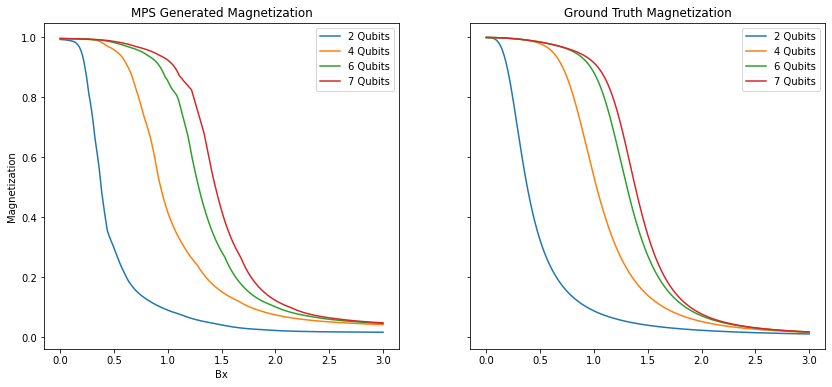

In [18]:
gen_graph(model)

In [19]:
torch.save(model.state_dict(), "2_site_model.pt")

In [20]:
def get_model(mps_size):
    PATH = "{}_site_model.pt".format(mps_size)
    device = torch.device('cpu')
    model = auto_encoder.MPS_autoencoder(mps_size)
    model.load_state_dict(torch.load(PATH, map_location=device))
    return model 

In [21]:
#model = get_model(2)

with torch.no_grad():
    encoded_spin_up = []
    encoded_spin_down = []
    
    
#     for i,(fields,wf) in enumerate(val_loader_4):
#         spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
#         encoded_spin_up.append(spin_up.squeeze())
#         encoded_spin_down.append(spin_down.squeeze())
        
#     for i,(fields,wf) in enumerate(val_loader_7):
#         spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
#         encoded_spin_up.append(spin_up.squeeze())
#         encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(training_loaders[0]):
        spin_up, spin_down = model.encode(fields)
        print(fields)
        print(spin_up.squeeze().shape)
        print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(training_loaders[1]):
        spin_up, spin_down = model.encode(fields)
        print(spin_up.squeeze().shape)
        print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())  

/import/linux/home1/jszacha1/research/MPSML/code/mps/virtual_env/lib/python3.7/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([[1.0000, 1.9220, 0.0100, 2.0000],
        [1.0000, 0.2080, 0.0100, 2.0000],
        [1.0000, 1.0895, 0.0100, 2.0000],
        [1.0000, 1.9592, 0.0100, 2.0000],
        [1.0000, 1.6040, 0.0100, 2.0000],
        [1.0000, 1.0905, 0.0100, 2.0000],
        [1.0000, 0.6132, 0.0100, 2.0000],
        [1.0000, 1.6109, 0.0100, 2.0000],
        [1.0000, 1.8887, 0.0100, 2.0000],
        [1.0000, 1.1020, 0.0100, 2.0000],
        [1.0000, 0.6777, 0.0100, 2.0000],
        [1.0000, 1.1317, 0.0100, 2.0000],
        [1.0000, 0.3975, 0.0100, 2.0000],
        [1.0000, 1.9622, 0.0100, 2.0000],
        [1.0000, 1.2228, 0.0100, 2.0000],
        [1.0000, 0.0466, 0.0100, 2.0000],
        [1.0000, 1.9134, 0.0100, 2.0000],
        [1.0000, 0.7157, 0.0100, 2.0000],
        [1.0000, 1.7671, 0.0100, 2.0000],
        [1.0000, 1.1283, 0.0100, 2.0000],
        [1.0000, 1.4059, 0.0100, 2.0000],
        [1.0000, 1.6647, 0.0100, 2.0000],
        [1.0000, 1.4589, 0.0100, 2.0000],
        [1.0000, 0.0820, 0.0100, 2

In [22]:
#model = get_model(2)

with torch.no_grad():
    encoded_spin_up = []
    encoded_spin_down = []        
       
    for i,(fields,wf) in enumerate(val_loaders[0]):
        spin_up, spin_down = model.encode(fields)
#         print(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(val_loaders[1]):
        spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())  

In [23]:
data_up = encoded_spin_up[0].numpy()
data_down = encoded_spin_down[0].numpy()
for i in range(1, len(encoded_spin_up)):
    data_up = np.vstack((data_up, encoded_spin_up[i].numpy()))
    data_down = np.vstack((data_down, encoded_spin_down[i].numpy()))
    
print(data_up.shape)
print(data_down.shape)

(11000, 5, 5)
(11000, 5, 5)


In [29]:
data_up = data_up.reshape((data_up.shape[0],25))
data_down = data_down.reshape((data_up.shape[0],25))

In [30]:
np.savetxt("mps_2_up_matrix.csv", data_up, delimiter=",")
np.savetxt("mps_2_down_matrix.csv", data_down, delimiter=",")

ValueError: x and y must have same first dimension, but have shapes (100,) and (500,)

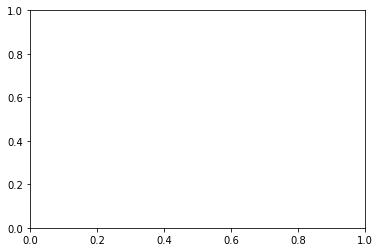

In [37]:
x = np.arange(1,101)
x = x / (100) * 5

plt.plot(x,data_up[0:500,0], label='00')
plt.plot(x,data_up[0:500,1], label='01')
plt.plot(x,data_up[0:500,2], label='10')
plt.plot(x,data_up[0:500,3], label='11')
plt.xlabel('Bx')
plt.title('Spin Matrix elements')
plt.legend()

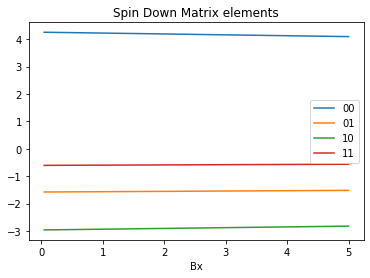

In [32]:
x = np.arange(1,101)
x = x / (100) * 5
k = 2
m = k-1
plt.plot(x,data_up[100*m:100*k,0], label='00')
plt.plot(x,data_up[100*m:100*k,1], label='01')
plt.plot(x,data_up[100*m:100*k,2], label='10')
plt.plot(x,data_up[100*m:100*k,3], label='11')
plt.xlabel('Bx')
plt.title('Spin Down Matrix elements')
plt.legend()

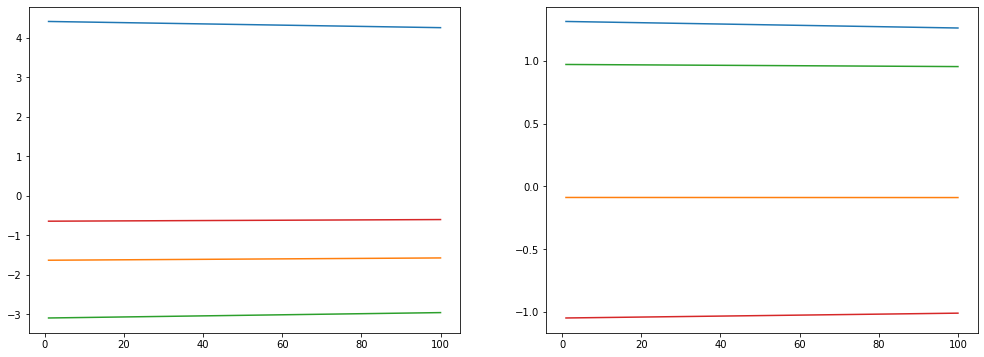

In [33]:
x = np.arange(1,101)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,6))

for i in range(4):
    for k in range(1):
        ax1.plot(x,data_up[100*k:100*(k+1),i])
        ax2.plot(x,data_down[100*k:100*(k+1),i])


(11000, 50)
(1000,)


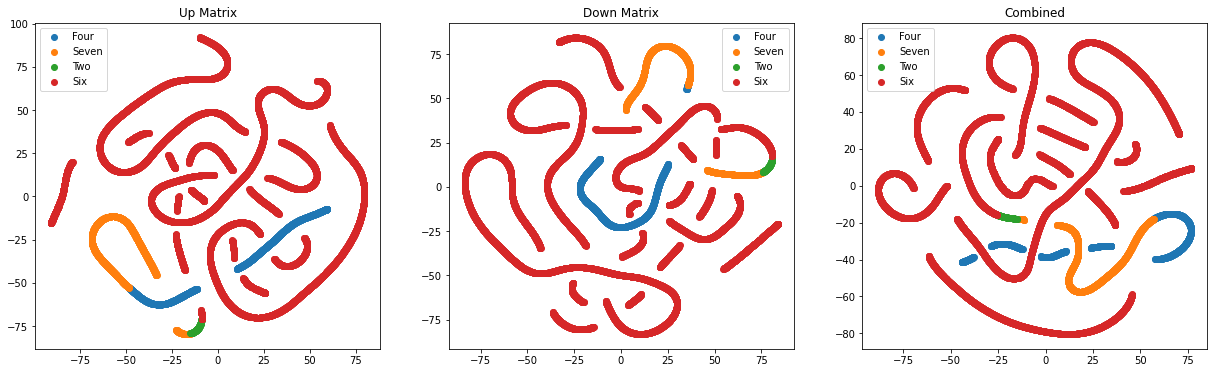

In [35]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

up=data_up
down=data_down
data = np.hstack((data_up, data_down))

print(data.shape)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,6))

pca = TSNE(n_components=2, perplexity=50)

up = pca.fit_transform(up)
down = pca.fit_transform(down)
data = pca.fit_transform(data)

print(up[:1000][:,0].shape)
ax1.scatter(up[:1000][:,0],up[:1000][:,1] ,label='Four')
ax1.scatter(up[1000:2000][:,0],up[1000:2000][:,1] ,label='Seven')
ax1.scatter(up[2000:2100][:,0],up[2000:2100][:,1] ,label='Two')
ax1.scatter(up[2100:][:,0],up[2100:][:,1] ,label='Six')
ax1.set_title('Up Matrix')

ax1.legend()

ax2.scatter(down[:1000][:,0],down[:1000][:,1] ,label='Four')
ax2.scatter(down[1000:2000][:,0],down[1000:2000][:,1] ,label='Seven')
ax2.scatter(down[2000:2100][:,0],down[2000:2100][:,1] ,label='Two')
ax2.scatter(down[2100:][:,0],down[2100:][:,1] ,label='Six')
ax2.set_title('Down Matrix')

ax2.legend()

ax3.scatter(data[:1000][:,0],data[:1000][:,1] ,label='Four')
ax3.scatter(data[1000:2000][:,0],data[1000:2000][:,1] ,label='Seven')
ax3.scatter(data[2000:2100][:,0],data[2000:2100][:,1] ,label='Two')
ax3.scatter(data[2100:][:,0],data[2100:][:,1] ,label='Six')
ax3.set_title('Combined')
ax3.legend()




(1000,)


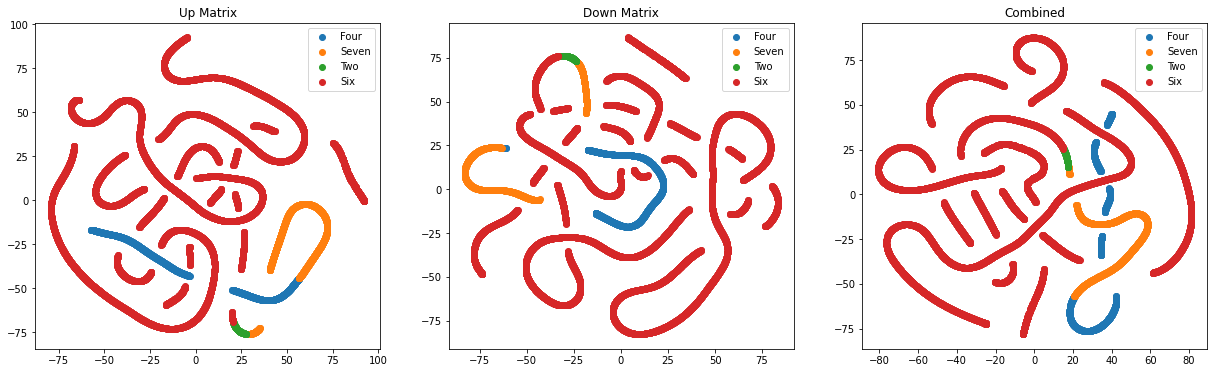

In [36]:
from sklearn.decomposition import PCA
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,6))

pca = PCA(n_components=2)

up = pca.fit_transform(up)
down = pca.fit_transform(down)
data = pca.fit_transform(data)

print(up[:1000][:,0].shape)
ax1.scatter(up[:1000][:,0],up[:1000][:,1] ,label='Four')
ax1.scatter(up[1000:2000][:,0],up[1000:2000][:,1] ,label='Seven')
ax1.scatter(up[2000:2100][:,0],up[2000:2100][:,1] ,label='Two')
ax1.scatter(up[2100:][:,0],up[2100:][:,1] ,label='Six')
ax1.set_title('Up Matrix')

ax1.legend()

ax2.scatter(down[:1000][:,0],down[:1000][:,1] ,label='Four')
ax2.scatter(down[1000:2000][:,0],down[1000:2000][:,1] ,label='Seven')
ax2.scatter(down[2000:2100][:,0],down[2000:2100][:,1] ,label='Two')
ax2.scatter(down[2100:][:,0],down[2100:][:,1] ,label='Six')
ax2.set_title('Down Matrix')

ax2.legend()

ax3.scatter(data[:1000][:,0],data[:1000][:,1] ,label='Four')
ax3.scatter(data[1000:2000][:,0],data[1000:2000][:,1] ,label='Seven')
ax3.scatter(data[2000:2100][:,0],data[2000:2100][:,1] ,label='Two')
ax3.scatter(data[2100:][:,0],data[2100:][:,1] ,label='Six')
ax3.set_title('Combined')
ax3.legend()